In [1]:
import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plt

In [2]:
# NHANES DATABASES links
# https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020
# https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013

# LABEL
# OSQ060 - ever diagnosed with osteoporosis? 1- yes, 2 - no, 7  - refused, 9 - don't know

# PARAMETERS

## Demographic Data P_DEMO
# RIDAGEYR - Age
# RIAGENDR - Gender 1-male, 2-female
# RIDRETH3 - Ethnicity


## Examination Data P_BMX
# BMXWT - weight
# BMXHT - height
# BMXBMI - bmi


## Dietary Data P_DR1TOT
# DR1TVD - vitamin D intake
# DR1TCALC - calcium intake


## Laboratory Data P_BIOPRO
# LBXSCA - total calcium mg/dL


## Questionaire Data
# Osteoporosis P_OSQ
# SEQN - patient number
# OSQ160a - did mother have osteoporosis? 1-mother
# OSQ160b - did father have osteoporosis? 2-father

# Alcohol usage P_ALQ
# ALQ121 - alcohol consumption in past 12 months
# ALQ130 - avg alcoholic drinks/day - past 12 months

# Smoking P_SMQ
# SMQ621 - amount of smoked cigarettes
# SMD030 - age at which started smoking regularly

# Reproductive health P_RHQ
# RHD043 - reason for not having regular periods (7 - menopause, 3 - hysterectomy)
# RHQ060 - age at last menstrual period
# RHQ540 - ever used female hormones? (excludes birth control and use for infertility) 1-yes, 2-no

# Excercise P_PAQ
# PAD615 - vigorous work in minutes on a work day
# PAD660 - vigorous excercise in minutes in a day
# PAD675 - moderate excercise in minutes in a day
# PAD680 - sedentary activity in minutes in a day
# PAD645 - walk/bike in minutes in a day


# not sure if we will use:
    
# OSQ020a - times broken/fractured a hip
# OSQ020b - times broken/fractured a wrist
# OSQ020c - times broken/fractured spine
# OSD050aa - reason for hip fracture
# OSD050ba - reason wrist fracture
# OSD050ca - reason spine fracture

In [3]:
folders = ["2013-2014", "2017-2020"]
files = ["OSQ", "DEMO", "BMX", "ALQ", "BIOPRO", "DR1TOT", "PAQ", "RHQ"]
codes = ['SEQN', 'OSQ060', 'ALQ121', 'ALQ130', 'RHD043', 'RHQ060', 'PAD615', 'PAD660', 'PAD675', 'PAD680', 'PAD645', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'BMXWT', 'BMXHT', 'BMXBMI', 'DR1TVD', 'DR1TCALC', 'LBXSCA']
labels_mapping = {
    'SEQN': 'patient',
    'OSQ060': 'osteoporosis',
    'ALQ121': 'alcohol past 12 mos',
    'ALQ130': 'avg alcohol/day past 12 mos',
    'RHD043': 'menopause',
    'RHQ060': 'age of last period',
    'PAD615': 'physical work (min)',
    'PAD660': 'vigorous exercise (min)',
    'PAD675': 'moderate exercise (min)',
    'PAD680': 'sedentary (min)',
    'PAD645': 'walk/bike (min)',
    'RIDAGEYR': 'age',
    'RIAGENDR': 'gender',
    'RIDRETH3': 'ethnicity',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'BMI',
    'DR1TVD': 'vit.D intake',
    'DR1TCALC': 'calcium intake',
    'LBXSCA': 'total calcium mg/dL'
}

data = pd.DataFrame(columns=['patient', 'osteoporosis', 'age', 'gender', 'ethnicity', 'weight', 'height', 'BMI', 'menopause', 'age of last period',  'vit.D intake', 'calcium intake', 'total calcium mg/dL', 'alcohol past 12 mos', 'avg alcohol/day past 12 mos', 'physical work (min)', 'vigorous exercise (min)', 'moderate exercise (min)', 'sedentary (min)', 'walk/bike (min)'])
for folder in folders:
    for file in files:
        file_path = f"{folder}/{file}.xpt"
        # file_path = "2015-2016/SMQ.xpt"
        df = pd.read_sas(file_path, format="xport")
        filtered = df.filter(items = codes)
        filtered.rename(columns=labels_mapping, inplace=True)
        data = pd.concat([data, filtered], ignore_index=True)
        data = data.groupby('patient', as_index=False).first()
    

# data.dropna(axis=0, how='any', inplace=True)
data = data.dropna(subset=["osteoporosis", "vit.D intake", "calcium intake", "total calcium mg/dL", "age", "gender", "ethnicity", "weight", "height", "alcohol past 12 mos"])
data = data.dropna(thresh=10)

data.dropna(subset=['osteoporosis'], inplace=True)
data = data[data['osteoporosis'].isin([1,2])]
data['menopause'] = data['menopause'].fillna(0) # !!! turned missing data to 0
data = data[data['menopause'].isin([7, 9, 0])]
data['osteoporosis'] = data['osteoporosis'].map({1:1, 2:0})
print(data.shape)
print(data['osteoporosis'].unique())
data
# 
# patient_rows = data[data['patient'] == 109290.0]
# patient_rows

C:\Users\omord\AppData\Local\Temp\ipykernel_2528\651745315.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)
C:\Users\omord\AppData\Local\Temp\ipykernel_2528\651745315.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)
C:\Users\omord\AppData\Local\Temp\ipykernel_2528\651745315.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In 

(2814, 20)
[0 1]


,patient,osteoporosis,age,gender,ethnicity,weight,height,BMI,menopause,age of last period,vit.D intake,calcium intake,total calcium mg/dL,alcohol past 12 mos,avg alcohol/day past 12 mos,physical work (min),vigorous exercise (min),moderate exercise (min),sedentary (min),walk/bike (min)
10186,109274.0,0,68.0,1.0,7.0,103.7,185.3,30.2,0.0,NaN,4.6,1309.0,9.1,4.000000e+00,2.0,480.0,NaN,60.0,300.0,60.0
10194,109282.0,0,76.0,1.0,3.0,83.3,177.1,26.6,0.0,NaN,0.9,770.0,9.1,5.397605e-79,NaN,NaN,NaN,NaN,900.0,NaN
10202,109290.0,0,68.0,2.0,4.0,73.0,161.2,28.1,7.0,45.0,4.1,409.0,9.9,5.397605e-79,NaN,NaN,NaN,90.0,180.0,30.0
10210,109298.0,0,68.0,1.0,3.0,90.2,162.5,34.2,0.0,NaN,0.4,160.0,9.4,5.397605e-79,NaN,120.0,NaN,NaN,120.0,NaN
10225,109313.0,0,63.0,1.0,3.0,75.2,172.6,25.2,0.0,NaN,8.3,1007.0,9.3,1.000000e+00,2.0,240.0,120.0,60.0,300.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25723,124811.0,1,76.0,1.0,3.0,69.9,182.7,20.9,0.0,NaN,10.5,1826.0,9.0,5.397605e-79,NaN,NaN,60.0,60.0,240.0,NaN
25724,124812.0,0,62.0,2.0,2.0,73.0,159.6,28.7,7.0,30.0,3.1,818.0,8.9,6.000000e+00,3.0,NaN,NaN,NaN,240.0,NaN
25726,124814.0,0,64.0,1.0,4.0,114.3,174.5,37.5,0.0,NaN,0.3,386.0,9.0,4.000000e+00,2.0,NaN,NaN,NaN,300.0,20.0
25727,124815.0,0,52.0,1.0,4.0,94.3,178.8,29.5,0.0,NaN,6.4,1488.0,9.6,3.000000e+00,1.0,360.0,120.0,120.0,60.0,60.0


In [4]:
data = data.drop(columns=['patient'])
instance = data.copy()

In [5]:
# unique values for cathegoricals
columns_to_check = ['gender', 'ethnicity', 'menopause']

for col in columns_to_check:
    print(f"{col}: {data[col].unique()}")


gender: [1. 2.]
ethnicity: [7. 3. 4. 1. 2. 6.]
menopause: [0. 7. 9.]


In [6]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from collections import Counter
import pandas as pd

In [7]:
numeric_cols = [c for c in instance.columns if instance[c].dtype in ['int64','float64'] and c != 'osteoporosis']


# Fit and transform
num_imputer = SimpleImputer(strategy='median')
numeric_imputed = num_imputer.fit_transform(instance[numeric_cols])

# debugging:
# print("Original DataFrame shape:", instance.shape)
# print("Numeric columns:", numeric_cols)
# print("Number of numeric columns:", len(numeric_cols))
# 
# numeric_imputed = num_imputer.fit_transform(instance[numeric_cols])
# print("Shape of imputed array:", numeric_imputed.shape)
# 
# for c in numeric_cols:
#     print(c, instance[c].isna().sum())
#     print(c, len(instance[c]))


# Assign back safely
instance[numeric_cols] = pd.DataFrame(numeric_imputed, columns=numeric_cols, index=instance.index)

# The target column stays untouched
print("Imputation done. Shape:", instance.shape)
for i in numeric_cols:
    print(i, instance[i].isna().sum())
instance.head()

print(instance['ethnicity'].unique())

Imputation done. Shape: (2814, 19)
age 0
gender 0
ethnicity 0
weight 0
height 0
BMI 0
menopause 0
age of last period 0
vit.D intake 0
calcium intake 0
total calcium mg/dL 0
alcohol past 12 mos 0
avg alcohol/day past 12 mos 0
physical work (min) 0
vigorous exercise (min) 0
moderate exercise (min) 0
sedentary (min) 0
walk/bike (min) 0
[7. 3. 4. 1. 2. 6.]


In [8]:
# cat_columns = ['gender', 'ethnicity','menopause']
# 
# 
# valid_values = {
#     'gender': [1, 2],
#     'ethnicity': [1,2,3,4,6,7],
#     'menopause': [0,7,9]
# }
# 
# for col in cat_columns:
#     instance[col] = instance[col].apply(lambda x: x if x in valid_values[col] else -1)
#     instance[col] = instance[col].fillna(-1)

In [9]:
# encoding gender ethnicity and menopause values to match the 0-N format
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'ethnicity', 'menopause']
encoders = {}

# Encode to 0..N
for col in categorical_cols:
    le = LabelEncoder()
    instance[col] = le.fit_transform(instance[col])
    encoders[col] = le


In [10]:
numeric_cols = [c for c in instance.columns 
                if c not in categorical_cols + ['osteoporosis']]

cat_idx = [instance.columns.get_loc(col) for col in categorical_cols]

smote_nc = SMOTENC(
    categorical_features=cat_idx,
    sampling_strategy={1: 600},
    random_state=42
)

X = instance.drop(columns=['osteoporosis'])
y = instance['osteoporosis']

X_res, y_res = smote_nc.fit_resample(X, y)
print("After SMOTENC:", Counter(y_res))

# undersampling negatives
rus = RandomUnderSampler(sampling_strategy={0: 600}, random_state=42)  # 0 = negative class
X_final, y_final = rus.fit_resample(X_res, y_res)
X_final['age'] = X_final['age'].round().astype(int)
X_final['BMI'] = X_final['weight'] / ( (X_final['height'] / 100) ** 2 )
print("After Tomek links:", Counter(y_final))

instance_balanced = pd.concat([X_final, y_final], axis=1)
print(instance_balanced.shape)
instance_balanced.head()

After SMOTENC: Counter({0: 2566, 1: 600})
After Tomek links: Counter({0: 600, 1: 600})
(1200, 19)


,age,gender,ethnicity,weight,height,BMI,menopause,age of last period,vit.D intake,calcium intake,total calcium mg/dL,alcohol past 12 mos,avg alcohol/day past 12 mos,physical work (min),vigorous exercise (min),moderate exercise (min),sedentary (min),walk/bike (min),osteoporosis
1058,55,0,4,61.4,165.9,22.308769,0,50.0,2.600000e+00,850.0,8.7,1.000000e+01,1.0,120.0,60.0,60.0,30.0,30.0,0
2284,56,1,2,82.6,166.8,29.688479,1,44.0,4.100000e+00,1035.0,9.8,5.397605e-79,2.0,120.0,60.0,30.0,360.0,30.0,0
1398,51,0,3,81.1,176.5,26.033433,0,50.0,5.397605e-79,2.0,9.5,9.000000e+00,4.0,120.0,60.0,45.0,120.0,30.0,0
1036,66,0,3,95.4,172.9,31.912321,0,50.0,8.800000e+00,476.0,8.8,5.397605e-79,2.0,120.0,60.0,45.0,600.0,30.0,0
2775,59,1,2,53.0,159.8,20.754980,1,50.0,1.740000e+01,3093.0,9.6,1.000000e+00,4.0,120.0,60.0,45.0,300.0,30.0,0


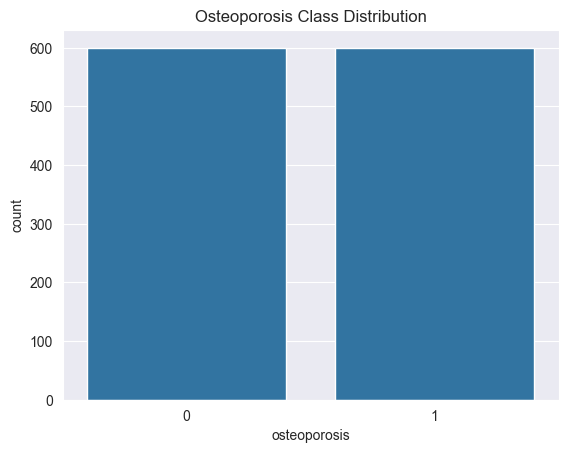

osteoporosis
0    600
1    600
Name: count, dtype: int64


In [11]:
sns.countplot(x=instance_balanced['osteoporosis'])
plt.title("Osteoporosis Class Distribution")
plt.show()

print(instance_balanced['osteoporosis'].value_counts())

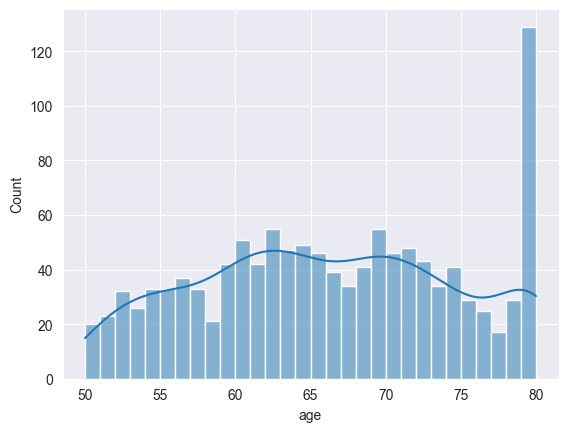

In [12]:
sns.histplot(instance_balanced['age'], bins=30, kde=True)
plt.show()

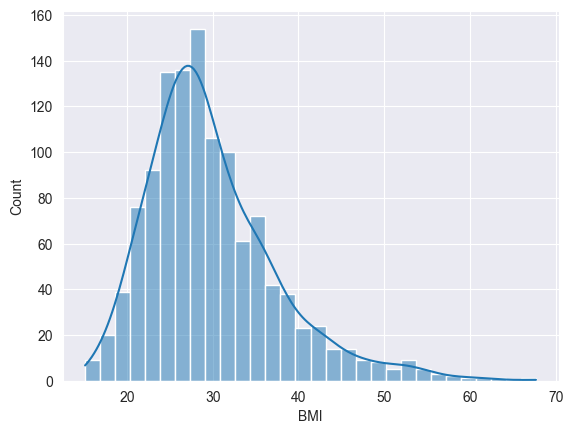

In [13]:
sns.histplot(instance_balanced['BMI'], bins=30, kde=True)
plt.show()

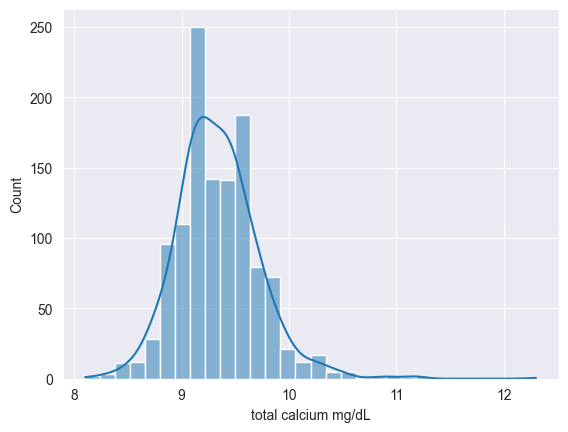

In [14]:
sns.histplot(instance_balanced['total calcium mg/dL'], bins=30, kde=True)
plt.show()

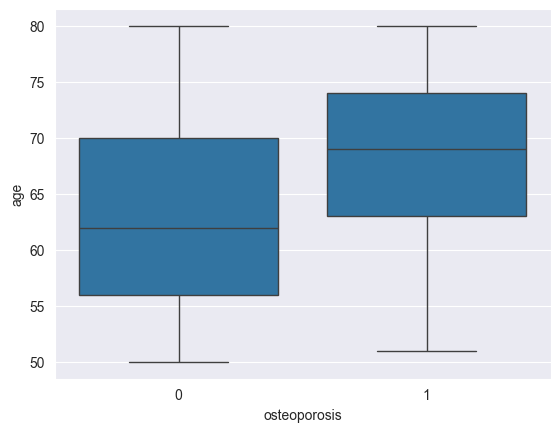

In [15]:
sns.boxplot(x=instance_balanced['osteoporosis'], y=instance_balanced['age'])
plt.show()

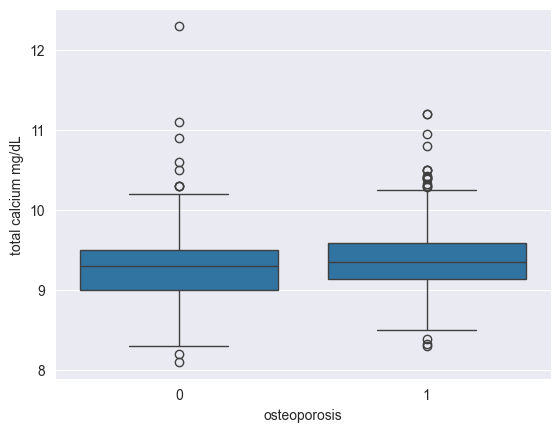

In [16]:
sns.boxplot(x=instance_balanced['osteoporosis'], y=instance_balanced['total calcium mg/dL'])
plt.show()

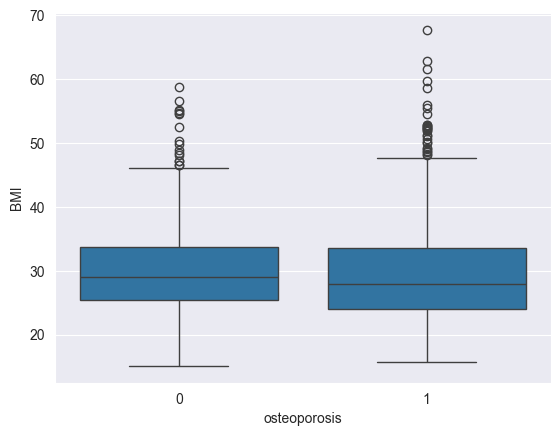

In [17]:
sns.boxplot(x=instance_balanced['osteoporosis'], y=instance_balanced['BMI'])
plt.show()

[0 1]


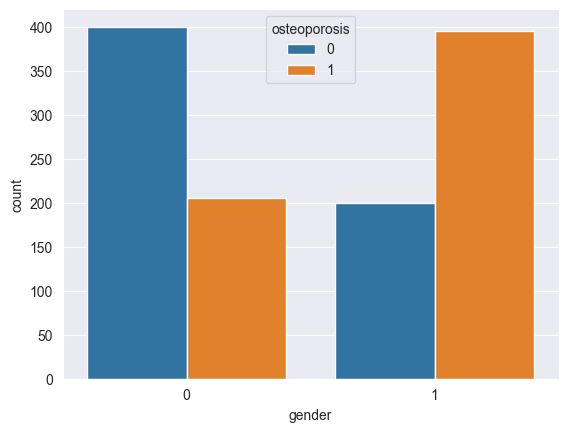

In [18]:
print(instance_balanced['gender'].unique())
sns.countplot(x=instance_balanced['gender'], hue=instance_balanced['osteoporosis'])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = instance_balanced.drop(columns=['osteoporosis'])
y = instance_balanced['osteoporosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Random Forrest Method

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    class_weight = {0: 1, 1: 1},
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices[:20]:
    print(X.columns[i], importances[i])

height 0.11333769248111916
calcium intake 0.10002127972296944
age 0.09584521553798143
weight 0.09577427088642712
BMI 0.09008502219837347
vit.D intake 0.08024378634795412
total calcium mg/dL 0.07533628624513726
sedentary (min) 0.05936597959497316
age of last period 0.05544271497266765
alcohol past 12 mos 0.042956432872475185
ethnicity 0.03603612932865426
moderate exercise (min) 0.034493165335517106
menopause 0.02831549184725638
avg alcohol/day past 12 mos 0.020812491286021813
gender 0.020351907203088576
walk/bike (min) 0.020337490666170313
physical work (min) 0.01771488093272943
vigorous exercise (min) 0.013529762540484094


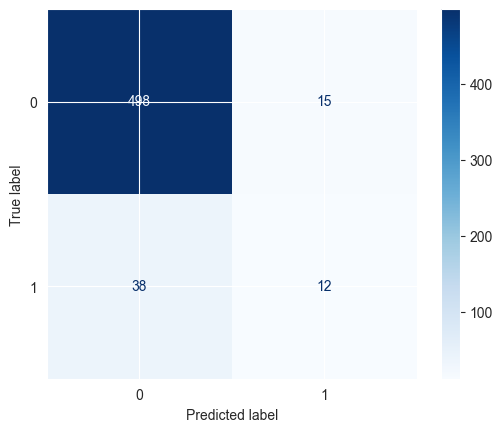

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       513
           1       0.44      0.24      0.31        50

    accuracy                           0.91       563
   macro avg       0.69      0.61      0.63       563
weighted avg       0.89      0.91      0.89       563



In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

probs = model.predict_proba(X_test)[:, 1]
y_pred_thr = np.where(probs >= 0.35, 1, 0)
cm = confusion_matrix(y_test, y_pred_thr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred_thr))

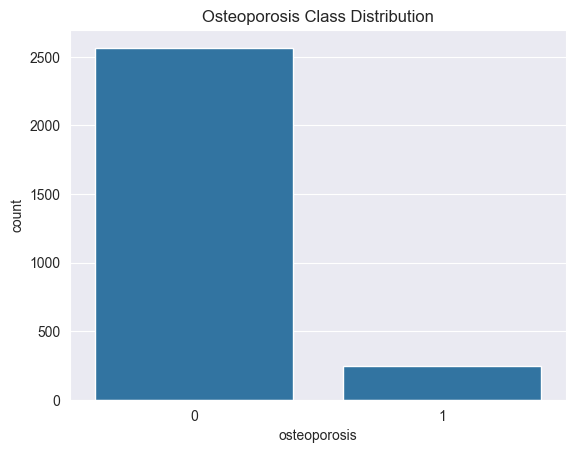

osteoporosis
0    2566
1     248
Name: count, dtype: int64


In [38]:
sns.countplot(x=instance['osteoporosis'])
plt.title("Osteoporosis Class Distribution")
plt.show()

print(instance['osteoporosis'].value_counts())

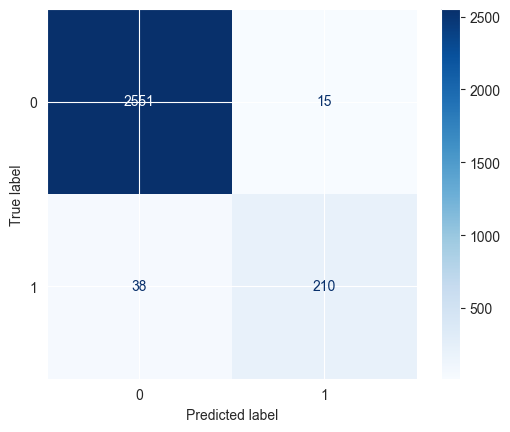

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2566
           1       0.93      0.85      0.89       248

    accuracy                           0.98      2814
   macro avg       0.96      0.92      0.94      2814
weighted avg       0.98      0.98      0.98      2814



In [39]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


X = instance.drop(columns=['osteoporosis'])
y = instance['osteoporosis']

probs = model.predict_proba(X)[:, 1]
y_pred_thr = np.where(probs >= 0.35, 1, 0)
cm = confusion_matrix(y, y_pred_thr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y, y_pred_thr))

2nd method - XGBoost Classifier

In [40]:
from xgboost import XGBClassifier

In [ ]:
neg = (y_train_res == 0).sum()
pos = (y_train_bin == 1).sum()
spw = neg / pos
print("scale_pos_weight =", spw)